In [97]:
# importing relevant libraries

import numpy as np
import cmath
import matplotlib.pyplot as plt



In [98]:
# defining the clock oscillators 

omega = 0.2

clockA_amp = 1
clockA_phi = np.arange(1,100,0.5)
A_phase = 0
coord_time = 1

def clock(amp, phi, phase, coord_time, omega):

    Avals = np.zeros(len(phi),dtype=complex)
  
    for i in range(len(phi)):
        
        cplex = omega*(1+phi[i])*coord_time
        exponent = complex(phase,cplex)
        #print(exponent)
        time = amp * cmath.exp(exponent)
        
        Avals[i] = time
        

    #print(Avals)
    return Avals

clockA_vals = clock(clockA_amp, clockA_phi, A_phase, coord_time, omega)





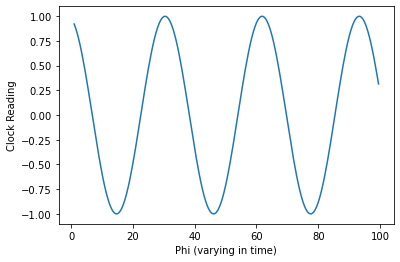

In [99]:
# plotting only the real part

realAvals = clockA_vals.real


plt.figure("Clock A Real")
plt.plot(clockA_phi, realAvals)
plt.xlabel("Phi (varying in time)")
plt.ylabel("Clock Reading")
plt.show()



/Users/suannlim/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


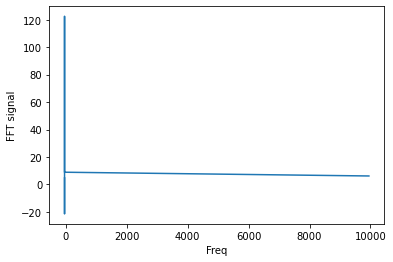

In [100]:
# now fft the values

import scipy
from scipy.fft import fft, ifft

# fft the time and signal
freq = fft(clockA_phi)
fft_signal = fft(clockA_vals)

real_fft_signal = fft_signal.real

plt.figure("Clock A FFT")
plt.plot(freq, real_fft_signal)
plt.xlabel("Freq")
plt.ylabel("FFT signal")
plt.show()






In [101]:
# defining clock B

clockB_amp = 1
clockB_phi = np.arange(1,50.5,0.25)
B_phase = 0
coord_time = 1

clockB_vals = clock(clockB_amp, clockB_phi, B_phase, coord_time, omega)
realB_vals = clockB_vals.real

xcorr_phi = clockA_phi - clockB_phi

xcorrelate = clock(clockA_amp, xcorr_phi, B_phase, coord_time,omega)

real_xcorrelate = xcorrelate.real

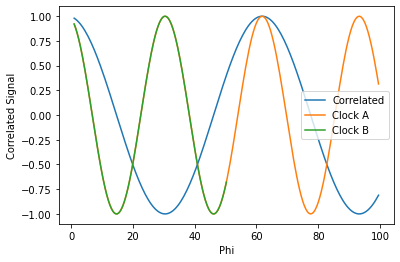

In [102]:
plt.figure("Cross Correlated Clocks")
plt.plot(clockA_phi, real_xcorrelate, label = "Correlated")
plt.plot(clockA_phi, realAvals, label = "Clock A")
plt.plot(clockB_phi, realB_vals, label = "Clock B")
plt.legend()
plt.xlabel("Phi")
plt.ylabel("Correlated Signal")
plt.show()

/Users/suannlim/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


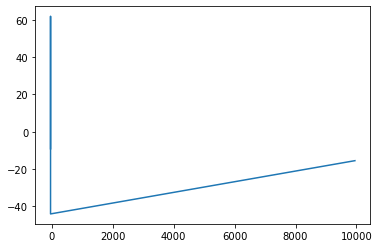

In [103]:
# fourier transforming the correlated signal

correlated_fft = fft(xcorrelate)
real_correlated_fft = correlated_fft.real

plt.figure("correlated fft")
plt.plot(freq, real_correlated_fft)
plt.xlabel("Freq")
plt.ylabel("FFT correlated signal")
plt.show()